In [ ]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/playgrounds4e06originaldata/original.csv')

In [4]:
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,4420,1,1,6,9773,1,1,125.0,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,4421,1,1,2,9773,1,1,120.0,105,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,4422,1,1,1,9500,1,1,154.0,1,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,4423,1,1,1,9147,1,1,180.0,1,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df.shape

(4424, 38)

In [6]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [7]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [16]:
import warnings
warnings.filterwarnings('ignore')

<Axes: title={'center': 'outliers For SK_ID_PREV'}>

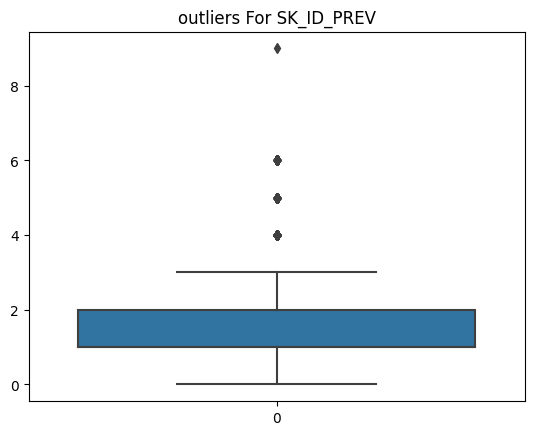

In [17]:
plt.title('outliers For SK_ID_PREV')
sns.boxplot(df['Application order'])

In [18]:
def outl(data):
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    
    IQR = Q3 - Q1
    
   
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    
    return ub,lb
    

In [19]:
ub,lb=outl(df['Previous qualification'])

<Axes: title={'center': 'outliers in for Previous qualification'}>

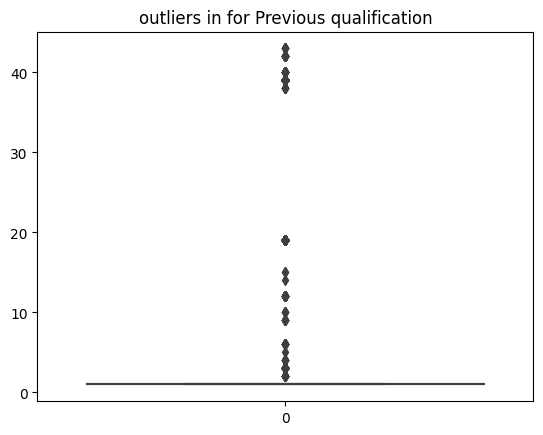

In [20]:
plt.title('outliers in for Previous qualification')
sns.boxplot(df['Previous qualification'])

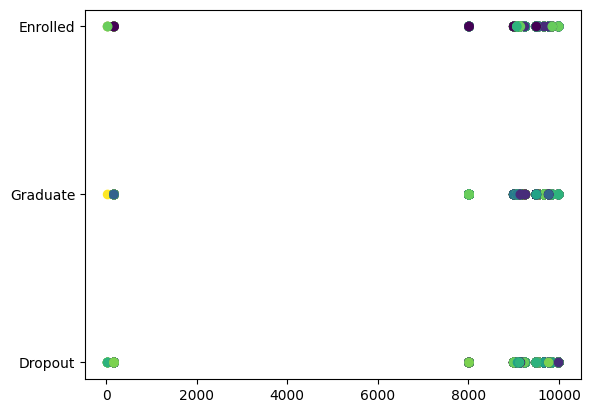

In [21]:
plt.scatter(df['Course'],df['Target'],c=df['GDP']);

<Axes: xlabel='Gender', ylabel='count'>

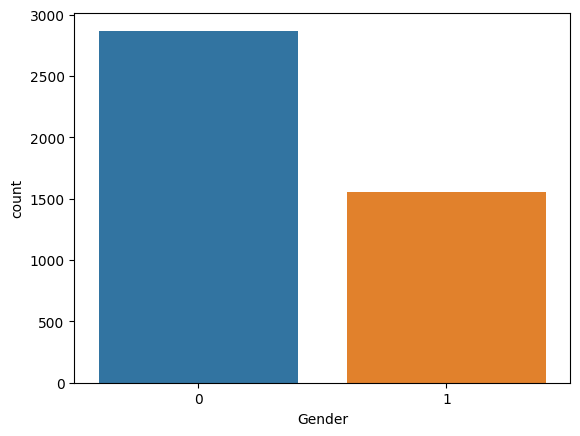

In [22]:
sns.countplot(x=df['Gender'])

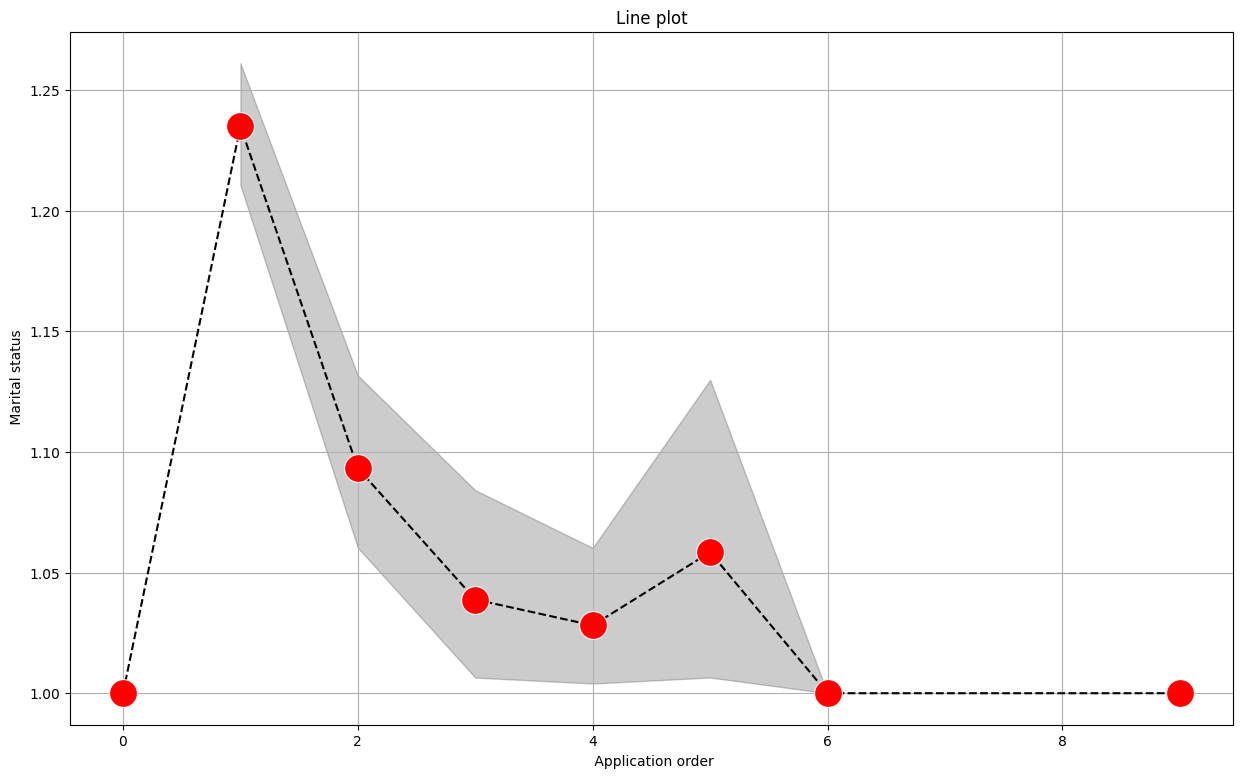

In [27]:
plt.figure(figsize = (15, 9))
sns.lineplot(x = 'Application order',y ='Marital status', data = df, marker='o',mfc = 'red', color = 'black', ls = '--',
        ms = 20) 
plt.title('Line plot')
plt.xlabel(' Application order')   # mfc - marker fonter  # ms= marker size   # ls - line style  # gride is 
plt.ylabel(' Marital status')

plt.grid(True)
plt.show()

<BarContainer object of 2 artists>

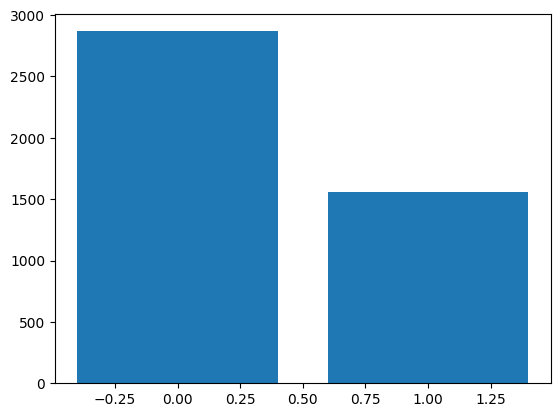

In [26]:
plt.bar(list(df['Gender'].value_counts().index),df['Gender'].value_counts())